## Final Project Submission

Please fill out:
* Student name: Josh Blumer
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: Jeff Herman
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

# Exploratory Data Analysis

## Import Necessary Libraries

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime as dt

## Import and Preview Data File

In [105]:
# Read file in as Pandas dataframe

df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [106]:
# Explore values

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [107]:
# Explore file metadata

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [108]:
# Change sqft_basement datatype to float

df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors = 'coerce')

In [109]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format = True)

In [110]:
df['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [111]:
df['yrs_old'] = [i.year for i in df['date']] - df['yr_built']
df['yrs_old'].head()

0    59
1    63
2    82
3    49
4    28
Name: yrs_old, dtype: int64

In [112]:
df['day_sold'] = df['date'].dt.dayofyear
df['day_sold'].head()

0    286
1    343
2     56
3    343
4     49
Name: day_sold, dtype: int64

In [113]:
# Check to verify change

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21143 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
yrs_old          21597 non-null int64
day_sold         21597 non-n

### Inspect Columns for Missing Values

In [114]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
yrs_old             0
day_sold            0
dtype: int64

In [115]:
# Impute missing 'view' values with column mode

df['view'] = df['view'].fillna(df['view'].mode()[0])

In [116]:
# Impute missing 'waterfront' values with column mode

df['waterfront'] = df['waterfront'].fillna(df['waterfront'].mode()[0])

In [117]:
# Verify null entries were edited. The remaining missing values with be removed 
# after checking features for multicollinearity

df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
yrs_old             0
day_sold            0
dtype: int64

## Visualize Feature Relationships with Target Variable

### Inspect Data Feature Dsitributions 

## Check Features for Multicollinearity

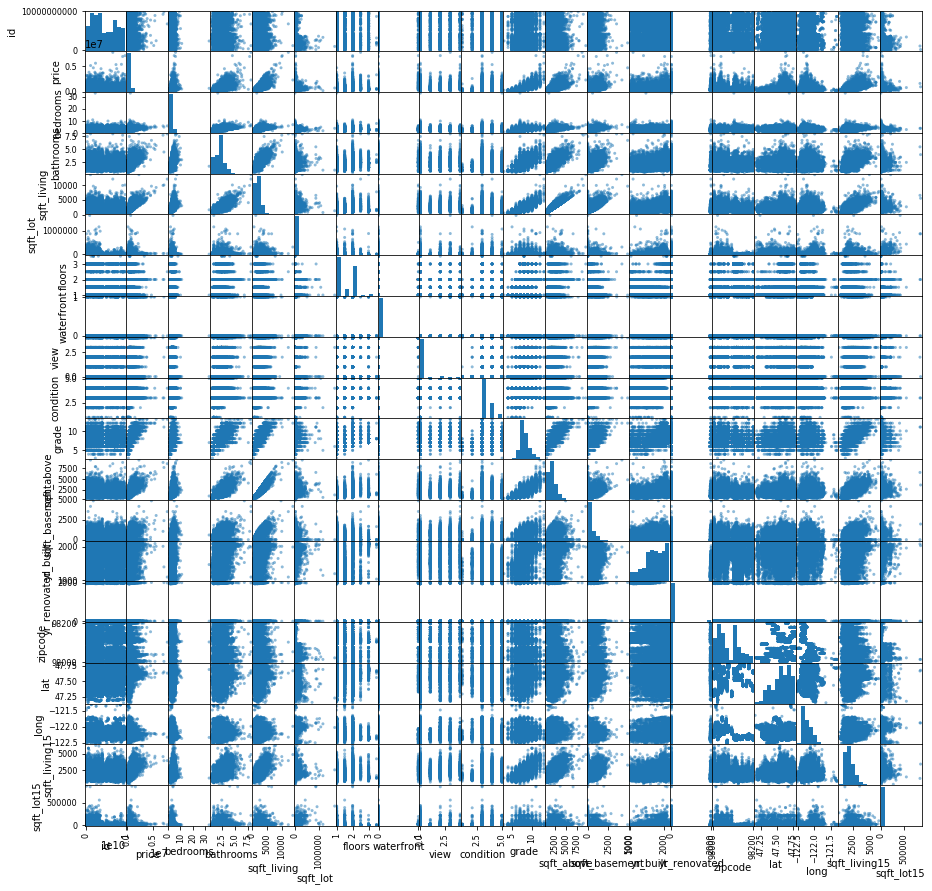

In [12]:
# Examine features for linear relationships

pd.plotting.scatter_matrix(df,figsize  = [15, 15]);
plt.show()

In [58]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_old,month_sold
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,0.011772,-0.023803,...,-0.004548,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557,-0.021458,-0.011572
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,...,0.325008,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845,-0.053890,-0.009928
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,...,0.302683,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690,-0.155817,-0.001046
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,...,0.282693,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303,-0.507561,0.007543
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,...,0.434576,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342,-0.318592,0.012112
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,...,0.015533,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204,-0.052853,-0.002591
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,...,-0.245144,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722,-0.489514,0.014245
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,...,0.084949,-0.024487,0.081397,0.028923,-0.012157,-0.037628,0.083823,0.030658,0.024406,0.008199
view,0.011772,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,...,0.275440,-0.054452,0.100977,0.085059,0.006321,-0.077702,0.278928,0.073083,0.054467,-0.005161
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,...,0.170972,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.360836,0.022388


In [14]:
abs(df.corr()) > 0.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


Sqft_living is highly correlated with bathrooms, grade, sqft_above, and sqft_living15. It is the most highly correlated with the target variable so we will be retaining it and removing the others due to them all being related to square footage. We will also be dropping 'id' because it isnt necessary.

In [118]:
df.drop(['sqft_above', 'sqft_living15', 'bathrooms', 'grade', 'id', 'yr_built', 'date'], axis = 1, inplace = True)

In [119]:
# Binarize yr_renovated to renovated and drop year_renovated to 

df['renovated'] = [0 if i == 0.0 else 1 for i in df['yr_renovated']]
df.drop(['yr_renovated'], axis = 1, inplace = True)

In [120]:
# Binarize sqft_basement to basement and drop sqft_basement 

df['basement'] = [0 if i == 0.0 else 1 for i in df['sqft_basement']]
df.drop(['sqft_basement'], axis = 1, inplace = True)

In [121]:
df.head()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,zipcode,lat,long,sqft_lot15,yrs_old,day_sold,renovated,basement
0,221900.0,3,1180,5650,1.0,0.0,0.0,3,98178,47.5112,-122.257,5650,59,286,0,0
1,538000.0,3,2570,7242,2.0,0.0,0.0,3,98125,47.7210,-122.319,7639,63,343,1,1
2,180000.0,2,770,10000,1.0,0.0,0.0,3,98028,47.7379,-122.233,8062,82,56,1,0
3,604000.0,4,1960,5000,1.0,0.0,0.0,5,98136,47.5208,-122.393,5000,49,343,0,1
4,510000.0,3,1680,8080,1.0,0.0,0.0,3,98074,47.6168,-122.045,7503,28,49,0,0


In [122]:
df.corr()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,zipcode,lat,long,sqft_lot15,yrs_old,day_sold,renovated,basement
price,1.000000,0.308787,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,-0.053402,0.306692,0.022036,0.082845,-0.053890,-0.011486,0.050430,0.175472
bedrooms,0.308787,1.000000,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,-0.154092,-0.009951,0.132054,0.030690,-0.155817,-0.001794,-0.003605,0.158345
sqft_living,0.701917,0.578212,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,-0.199802,0.052155,0.241214,0.184342,-0.318592,0.011368,0.013977,0.198059
sqft_lot,0.089876,0.032471,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,-0.129586,-0.085514,0.230227,0.718204,-0.052853,-0.002576,-0.006607,-0.033979
floors,0.256804,0.177944,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,-0.059541,0.049239,0.125943,-0.010722,-0.489514,0.013619,-0.004810,-0.248292
waterfront,0.264306,-0.002127,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.028923,-0.012157,-0.037628,0.030658,0.024406,0.009473,0.031776,0.039933
view,0.393497,0.078354,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.085059,0.006321,-0.077702,0.073083,0.054467,-0.004177,0.044810,0.176662
condition,0.036056,0.026496,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,0.002888,-0.015102,-0.105877,-0.003126,0.360836,0.021967,-0.027056,0.129050
zipcode,-0.053402,-0.154092,-0.199802,-0.129586,-0.059541,0.028923,0.085059,0.002888,1.000000,0.266742,-0.564259,-0.147294,0.347206,-0.000408,0.034804,0.161230
lat,0.306692,-0.009951,0.052155,-0.085514,0.049239,-0.012157,0.006321,-0.015102,0.266742,1.000000,-0.135371,-0.086139,0.147898,0.013486,0.023734,0.132742


In [123]:
abs(df.corr()) > 0.75

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,zipcode,lat,long,sqft_lot15,yrs_old,day_sold,renovated,basement
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
zipcode,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
lat,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


## Examine Feature Variables for Outliers

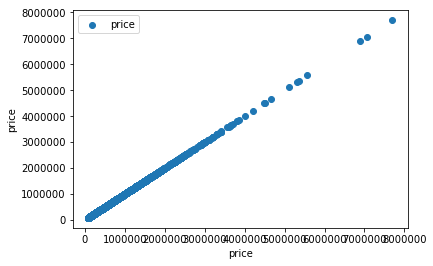

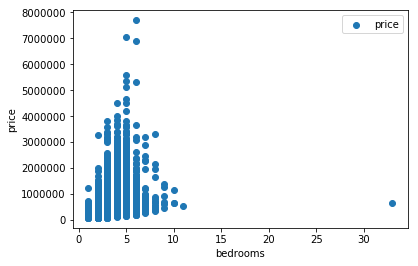

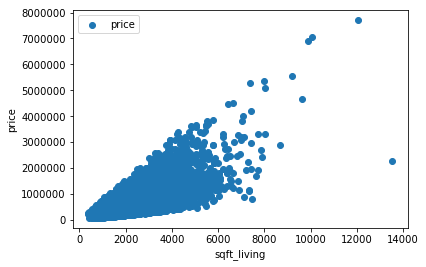

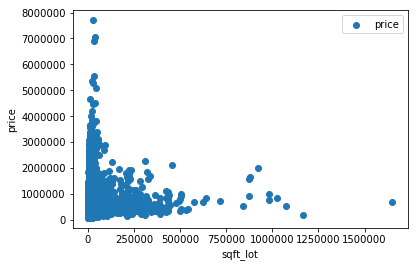

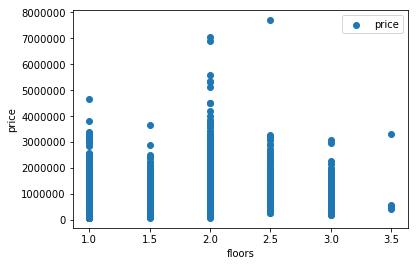

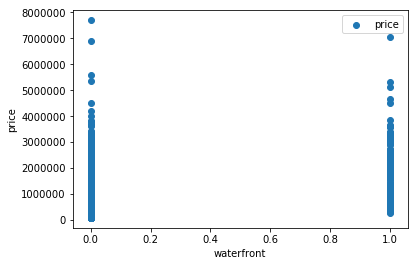

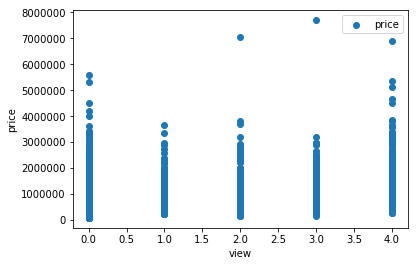

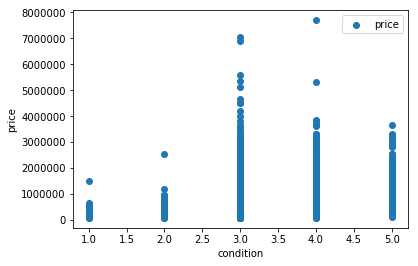

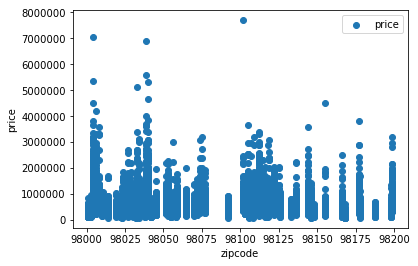

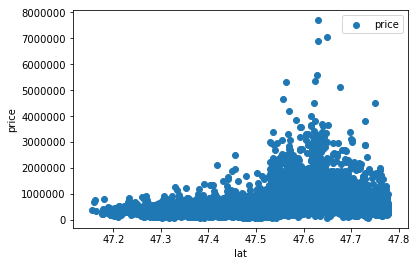

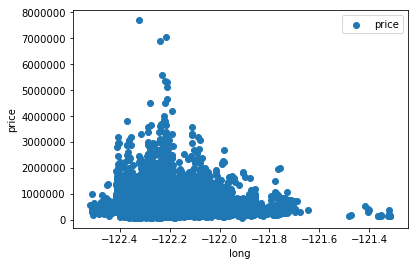

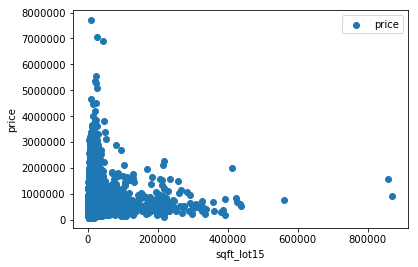

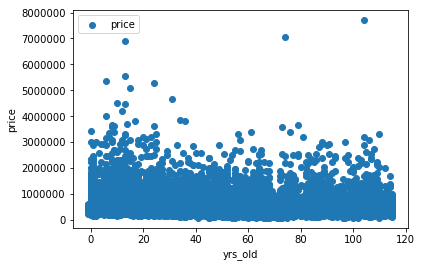

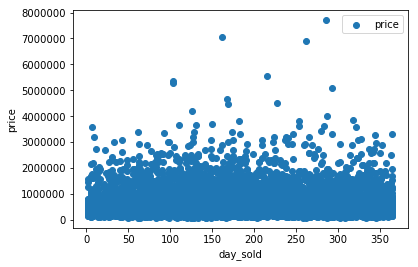

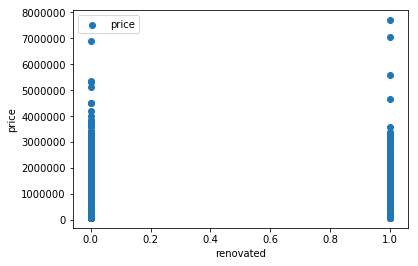

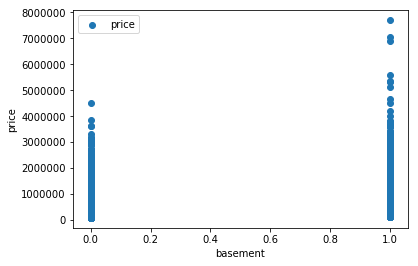

In [125]:
for i, col in enumerate(df.columns):
    plt.figure(i)
    plt.scatter(x = df[col], y = df['price'])
    plt.ylabel('price')
    plt.xlabel(col)
    plt.legend()

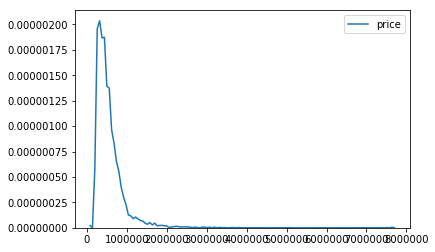

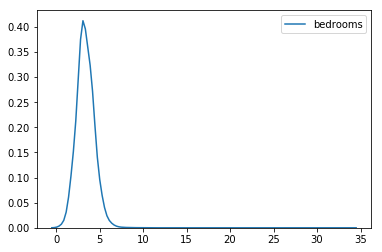

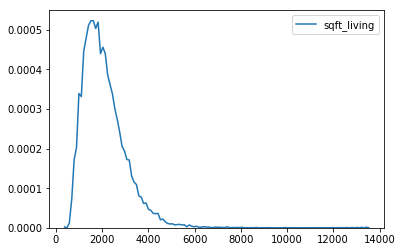

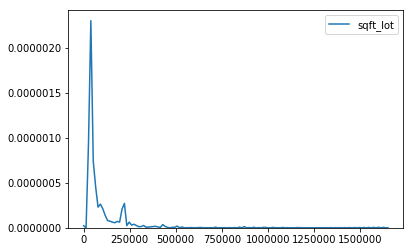

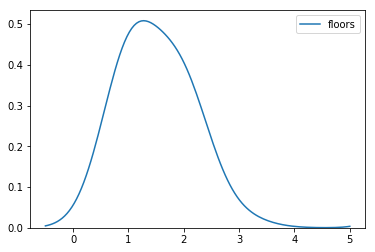

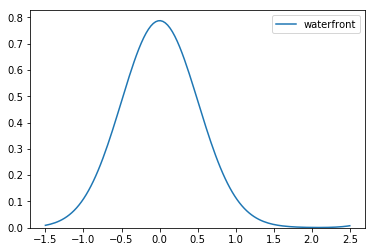

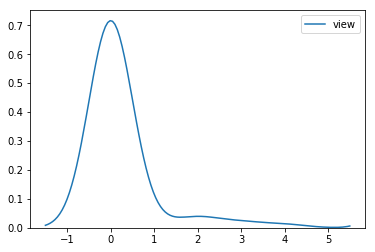

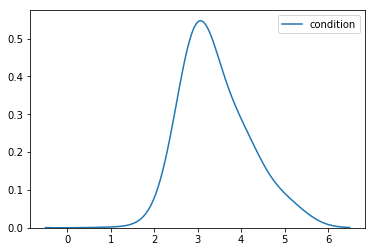

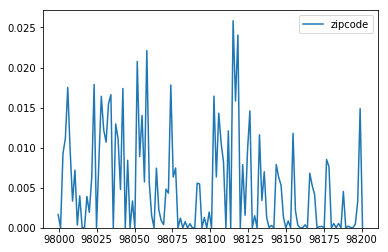

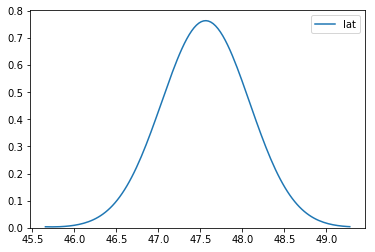

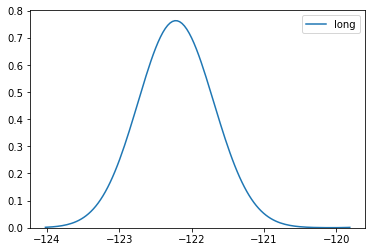

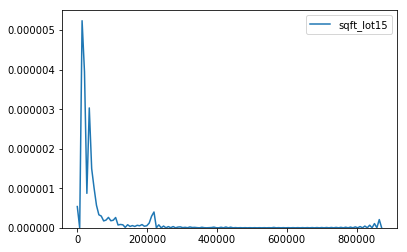

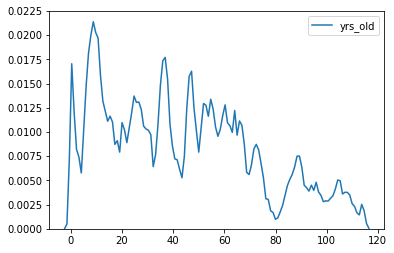

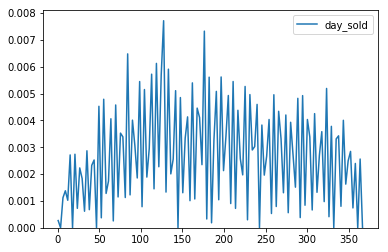

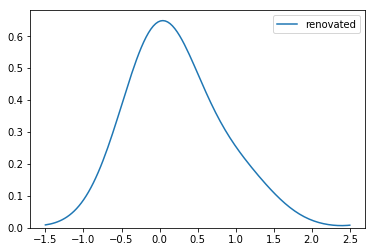

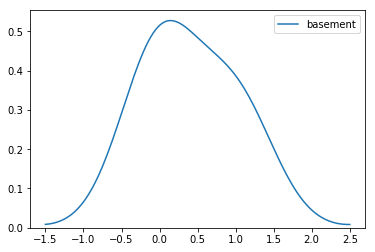

In [127]:
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.kdeplot(df[col], bw = 0.5)

## Split Features into Categorical and Continuous

In [28]:
cat = ['waterfront', 'renovated', 'basement']
df_cat = df[cat]

In [29]:
cont = ['sqft_living', 'sqft_lot', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_lot15', 'bedrooms', 'floors', 'condition', 'view']
df_cont = df[cont]

## Create Dummy Variables with Categorical Features